In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [19]:
%matplotlib inline

In [13]:
path = r'/Users/emilypickett/Documents/Medical Cost '

In [3]:
#import data
medical_df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'insurance.csv'), index_col = False)

In [17]:
region_geo = r'/Users/emilypickett/Documents/Medical Cost /Data/Original Data/us_region.json'

In [20]:
# Checking at the JSON file contents:

f = open(r'/Users/emilypickett/Documents/Medical Cost /Data/Original Data/us_region.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Midwest'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.32617187499999, 49.03786794532644], [-103.974609375, 41.04621681452063], [-101.6015625, 41.04621681452063], [-102.48046875, 37.020098201368114], [-94.5703125, 37.09023980307208], [-93.603515625, 36.4566360115962], [-89.296875, 37.23032838760387], [-87.71484375, 38.272688535980976], [-85.4296875, 38.54816542304656], [-84.638671875, 39.16414104768742], [-83.232421875, 38.75408327579141], [-82.177734375, 38.685509760012], [-80.85937499999999, 39.842286020743394], [-80.595703125, 41.57436130598913], [-83.583984375, 41.96765920367816], [-82.79296874999999, 42.4234565179383], [-82.705078125, 43.389081939117496], [-83.232421875, 43.70759350405294], [-84.111328125, 43.96119063892024], [-83.49609375, 44.653024159812], [-84.55078125, 45.460130637921004], [-85.4296875, 45.1510532655634], [-86.396484375, 44.213709909702054], [-86.220703125, 43.389081939117496], [-86.220703125, 42.163403424

### Data Wrangle

In [32]:
#changing to uppercase to match json file
medical_df['region'] = medical_df['region'].str.title()

In [41]:
medical_df['region'].value_counts()

region
Southeast    364
Southwest    325
Northwest    325
Northeast    324
Name: count, dtype: int64

In [42]:
#matching region names to json file
medical_df['region'].replace({'Southeast': 'South', 'Southwest': 'West', 'Northwest': 'Midwest'}, inplace=True)

In [43]:
medical_df['region'].value_counts()

region
South        364
West         325
Midwest      325
Northeast    324
Name: count, dtype: int64

### Extreme Values 

In [44]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,West,16884.92400
1,18,male,33.770,1,no,South,1725.55230
2,28,male,33.000,3,no,South,4449.46200
3,33,male,22.705,0,no,Midwest,21984.47061
4,32,male,28.880,0,no,Midwest,3866.85520


<Axes: xlabel='age', ylabel='Count'>

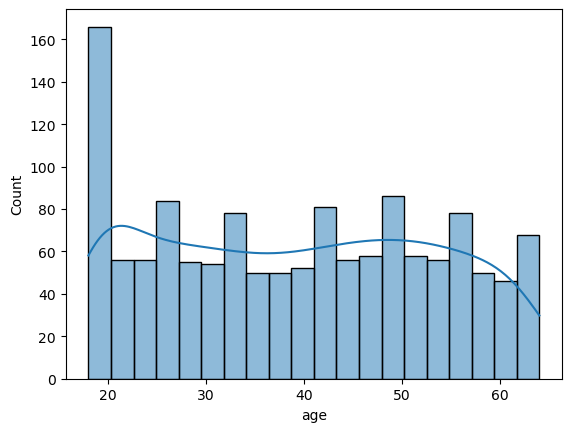

In [23]:
sns.histplot(medical_df['age'], bins=20, kde = True)

<Axes: xlabel='bmi', ylabel='Count'>

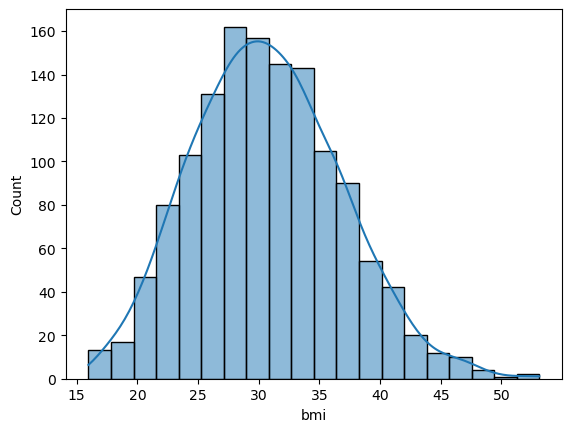

In [24]:
sns.histplot(medical_df['bmi'], bins=20, kde = True)

<Axes: xlabel='charges', ylabel='Count'>

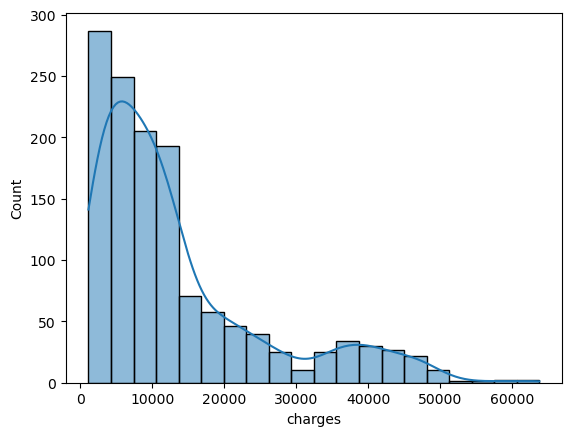

In [25]:
sns.histplot(medical_df['charges'], bins=20, kde = True)

In [45]:
# Check how many extreme values

medical_df[medical_df['charges'] >55000]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,South,63770.42801
577,31,female,38.095,1,yes,Northeast,58571.07448
819,33,female,35.530,0,yes,Midwest,55135.40209
1230,52,male,34.485,3,yes,Midwest,60021.39897
1300,45,male,30.360,0,yes,South,62592.87309


### Choropleth maps

In [51]:
sub_bmi= medical_df[['region','bmi']]
sub_bmi.head()

,region,bmi
0,West,27.900
1,South,33.770
2,South,33.000
3,Midwest,22.705
4,Midwest,28.880


In [52]:
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

folium.Choropleth(
    geo_data=region_geo,
    data=medical_df,
    columns=['region', 'bmi'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='BMI'
).add_to(map)

folium.LayerControl().add_to(map)

map

In [48]:
# Save the map as an HTML file
map.save('BMI_map.html')

In [50]:
sub_charges= medical_df[['region','charges']]
sub_charges.head()

,region,charges
0,West,16884.92400
1,South,1725.55230
2,South,4449.46200
3,Midwest,21984.47061
4,Midwest,3866.85520


In [54]:
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

folium.Choropleth(
    geo_data=region_geo,
    data=medical_df,
    columns=['region', 'charges'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='charges'
).add_to(map)

folium.LayerControl().add_to(map)

map

In [55]:
# Save the map as an HTML file
map.save('charges_map.html')

In [59]:
sub_age= medical_df[['region','age']]
sub_age.head()

,region,age
0,West,19
1,South,18
2,South,28
3,Midwest,33
4,Midwest,32


In [57]:
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

folium.Choropleth(
    geo_data=region_geo,
    data=medical_df,
    columns=['region', 'age'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='age'
).add_to(map)

folium.LayerControl().add_to(map)

map

In [60]:
# Save the map as an HTML file
map.save('ages_map.html')

### Discussion

Additional questions it brings: 
what factors make the regions have different BMI?
Why does the highest BMI region not have the highest charges or oldest people? BMi might not be a factor to medical charges. 

Doesn't answer the question of:
What factors cause high medical charges?
